# 20.3.2 Craft a Story from a Dataset<a id='20_3_2_Craft_a_Story_from_a_Dataset'></a>

  * [1 Exploring Race and Gender Income Disparity US 1994](#1_Exploring_Race_and_Gender_Income_Disparity_US_1994)
  * [2 Preparation](#2_Preparation) 
  * [2,1 Imports](#2.1_Imports)
  * [2.2 Functions](#2.2_Functions)
  * [2.3 Constants](#2.3_Constants)
  * [2.4 Data Load](#2.4_Data_Load) 
  * [3 Data Examination](#3_Data_Examination)
  * [4 Data Organization](#4_Data_Organization)
  * [4.1 Dataframe Modifications](#4_1_Dataframe_Modifications)
  * [4.2 Population Summaries](#4_2_Population_Summaries)
  * [5 Data Visualization](#5_Data_Visualization)
  * [6 Summary](#6_Summary)


## 1 Exploring Race and Gender Income Disparity US 1994<a id='1_Exploring_Race_and_Gender_Income_Disparity_US_1994'></a>

Goal: See if there appears to be disparities in income based on race and gender in the US in 1994.

One of the datasets suggested for this assignment was the https://www.kaggle.com/wenruliu/adult-income-dataset
This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). The kaggle task was to use it to create a model to determine whether a person makes over $50K a year.

This task was not for machine learning, however.  It was a visualization task.  With this in mind, a question I had was would the data indicate possible inequities in pay by gender and by race and how I could visually express what the data showed.  By recent data that shows females get paid less for the same kind of work than males and the same as blacks to whites, one would expect this data to show numbers that would support that direction in income, especially since it was 27 years ago, where one would expect that to be worse.  However, expectations aside, would this data 1994 census data indicate a related income disparity and how much of a disparity?

To prepare and present the data, I did the following steps:
- Data preparation
- Data examination
- Data organization (to best make comparisons)
- Data visualization 


## 2 Preparation<a id='2_Preparation'></a>

### 2.1 Imports<a id='2.1_Imports'></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

from library.sb_utils import save_file

### 2.2 Functions<a id='2.2_Functions'></a>

In [2]:
def educ_2groups(row):
    if row['educational-num'] < 13:
        return '1 Below Bachelors'
    else:
        return '2 Bachelors and Above'
    
def race_3groups(row):
    if row['race'] in ['Black', 'White']:
        return row['race']
    else:
        return 'Other'

In [3]:
def pretty_print_var(var_name):
    print(var_name + ' = ' + str(eval(var_name)))

In [4]:
def pretty_print_var_list(var_list):
    for var_name in var_list:
        pretty_print_var(var_name)

### 2.3 Constants<a id='2.3_Constants'></a> 

In [5]:
# Constants
male_pop_percentage_1994 = 0.491
female_pop_percentage_1994 = 0.509
white_pop_percentage_1994 = 0.831
black_pop_percentage_1994 = 0.125

### 2.4 Data Load<a id='2.4_Data_Load'></a>

In [6]:
adult_income_orig = pd.read_csv('data/adult.csv')
adult_income = pd.read_csv('data/adult.csv')

## 3 Data Examination<a id='3_Data_Examination'></a>

In [7]:
adult_income.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [8]:
adult_income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [9]:
adult_income.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


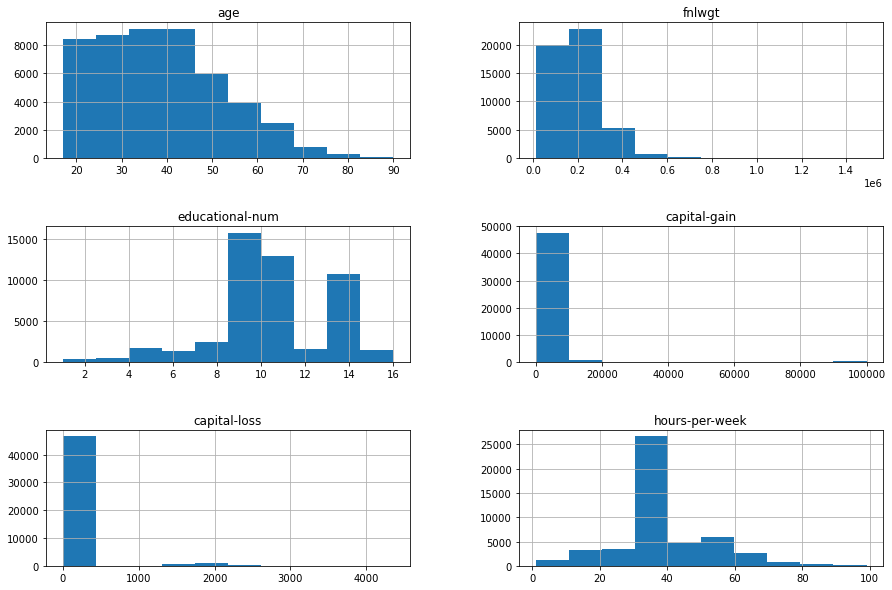

In [10]:
adult_income.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5);

In [28]:
adult_income['hours-per-week'].value_counts()

40    22803
50     4246
45     2717
60     2177
35     1937
      ...  
69        1
94        1
79        1
82        1
87        1
Name: hours-per-week, Length: 96, dtype: int64

#### Things to note:

From all the numeric data information above, only education is relevant for this rough exploration.  Hours per week were going to be limited to 40, which is a standard work week and the value for most of the population.


What is fnlwgt?

From adult.names, definition of fnlwgt is below. While the definition is not entirely clear to me, it appears to be some kind of determined weight whereby similar weights indicate similar socio-economic population characteristics.  I decided this was not useful for this exploration.

<i>Description of fnlwgt (final weight)

The weights on the CPS files are controlled to independent estimates of the
civilian noninstitutional population of the US.  These are prepared monthly
for us by Population Division here at the Census Bureau.  We use 3 sets of
controls.

  These are:
          1.  A single cell estimate of the population 16+ for each state.
          2.  Controls for Hispanic Origin by age and sex.
          3.  Controls by Race, age and sex.

We use all three sets of controls in our weighting program and "rake" through
them 6 times so that by the end we come back to all the controls we used.

The term estimate refers to population totals derived from CPS by creating
"weighted tallies" of any specified socio-economic characteristics of the
population.

People with similar demographic characteristics should have
similar weights.  There is one important caveat to remember
about this statement.  That is that since the CPS sample is
actually a collection of 51 state samples, each with its own
probability of selection, the statement only applies within
state.</i>

In [11]:
adult_income['education'].unique()

array(['11th', 'HS-grad', 'Assoc-acdm', 'Some-college', '10th',
       'Prof-school', '7th-8th', 'Bachelors', 'Masters', 'Doctorate',
       '5th-6th', 'Assoc-voc', '9th', '12th', '1st-4th', 'Preschool'],
      dtype=object)

In [12]:
adult_income['educational-num'].unique()

array([ 7,  9, 12, 10,  6, 15,  4, 13, 14, 16,  3, 11,  5,  8,  2,  1],
      dtype=int64)

In [13]:
adult_income['race'].unique()

array(['Black', 'White', 'Asian-Pac-Islander', 'Other',
       'Amer-Indian-Eskimo'], dtype=object)

In [14]:
adult_income['native-country'].unique()

array(['United-States', '?', 'Peru', 'Guatemala', 'Mexico',
       'Dominican-Republic', 'Ireland', 'Germany', 'Philippines',
       'Thailand', 'Haiti', 'El-Salvador', 'Puerto-Rico', 'Vietnam',
       'South', 'Columbia', 'Japan', 'India', 'Cambodia', 'Poland',
       'Laos', 'England', 'Cuba', 'Taiwan', 'Italy', 'Canada', 'Portugal',
       'China', 'Nicaragua', 'Honduras', 'Iran', 'Scotland', 'Jamaica',
       'Ecuador', 'Yugoslavia', 'Hungary', 'Hong', 'Greece',
       'Trinadad&Tobago', 'Outlying-US(Guam-USVI-etc)', 'France',
       'Holand-Netherlands'], dtype=object)

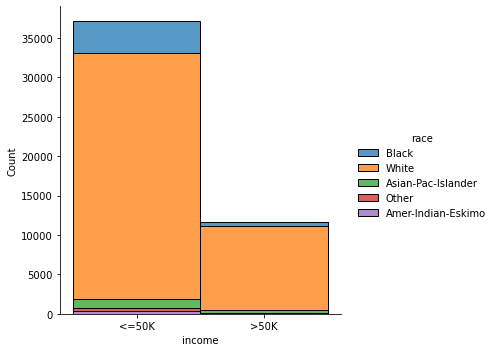

In [15]:
sns.displot(data=adult_income, x="income", hue="race", multiple="stack")

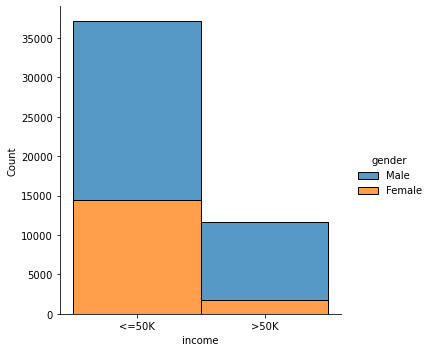

In [16]:
sns.displot(data=adult_income, x="income", hue="gender", multiple="stack")

#### Data examination take-aways:
    
    - Use US Data only
    
    - Use 40 hour work week only
    
    - Use less education categories - reduce to two groups for clearer comparison
    
    - Use less race categories - reduce to three groups for clearer comparison
    
    - Use only some columns: gender, race in three groups, income, education in two groups
    
    - There is the hint that there might be interesting results, although more needed to be clear 
    

## 4 Data Organization<a id='4_Data_Organization'></a>

### 4.1 Dataframe Modifications<a id='4_1_Dataframe_Modifications'></a>

In [33]:
# NOT USED
# Create column that contains both order and description of education levels
adult_income['educ_full']=adult_income['educational-num'].astype(str).str.zfill(2) + '_' + adult_income['education']
educ_list = adult_income['educ_full'].unique()
educ_list.sort()
# Show education levels
print(educ_list)

['01_Preschool' '02_1st-4th' '03_5th-6th' '04_7th-8th' '05_9th' '06_10th'
 '07_11th' '08_12th' '09_HS-grad' '10_Some-college' '11_Assoc-voc'
 '12_Assoc-acdm' '13_Bachelors' '14_Masters' '15_Prof-school'
 '16_Doctorate']


In [32]:
# Combine education groups into two groups - below bachelors degree and bachelors degree and above
# (Apply function educ_2groups to every row)
adult_income['educ2grps'] = adult_income.apply(educ_2groups, axis=1)
adult_income['educ2grps'].unique()

array(['1 Below Bachelors', '2 Bachelors and Above'], dtype=object)

In [19]:
adult_income['race'].unique()

array(['Black', 'White', 'Asian-Pac-Islander', 'Other',
       'Amer-Indian-Eskimo'], dtype=object)

In [20]:
# Combine race groups into three groups - white, black, other
# (Apply function educ_2groups to every row)
adult_income['race3grps'] = adult_income.apply(race_3groups, axis=1)
adult_income['race3grps'].unique()

array(['Black', 'White', 'Other'], dtype=object)

In [21]:
# Want to only look at US citizens 
us_adult_income = adult_income[adult_income['native-country'] == 'United-States']
# To get a typical, consistent working population, limited to those who worked 40 hours a week
working_pop_1994 = us_adult_income[adult_income['hours-per-week'] == 40]

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


### 4.2 Population Summaries<a id='4_2_Population_Summaries'></a>

In [31]:
# Population total information in list form
pop_total = working_pop_1994.iloc[0:,0].count()
race3grps_totals = working_pop_1994.iloc[0:,17].value_counts()
gender_totals = working_pop_1994.iloc[0:,9].value_counts()

In [23]:
# Get and print useful gender, race population information
white_pop_total = race3grps_totals[0]
black_pop_total = race3grps_totals[1]
other_race_pop_total = race3grps_totals[2]
male_pop_total = gender_totals[0]
female_pop_total = gender_totals[1]
#
#Reminder of constants defined above:
#male_pop_percentage_1994 = 0.491
#female_pop_percentage_1994 = 0.509
#white_pop_percentage_1994 = 0.831
#black_pop_percentage_1994 = 0.125
#
# Get expected populations
expected_white_pop_total = pop_total * white_pop_percentage_1994
expected_black_pop_total = pop_total * black_pop_percentage_1994
expected_male_pop_total = pop_total * male_pop_percentage_1994
expected_female_pop_total = pop_total * female_pop_percentage_1994
# 
# Get other race percentage of total population
other_race_percentage_of_pop_total = other_race_pop_total / pop_total
#
# Print various population totals
gender_var_list = ['pop_total', 'male_pop_total', 'expected_male_pop_total', 
                   'female_pop_total', 'expected_female_pop_total']
pretty_print_var_list(gender_var_list)
race_var_list = ['white_pop_total', 'expected_white_pop_total', 
                 'black_pop_total', 'expected_black_pop_total', 
                 'other_race_pop_total', 'other_race_percentage_of_pop_total']
pretty_print_var_list(race_var_list)

pop_total = 20120
male_pop_total = 13555
expected_male_pop_total = 9878.92
female_pop_total = 6565
expected_female_pop_total = 10241.08
white_pop_total = 17083
expected_white_pop_total = 16719.719999999998
black_pop_total = 2474
expected_black_pop_total = 2515.0
other_race_pop_total = 563
other_race_percentage_of_pop_total = 0.027982107355864812


#### Note:
The other race category only contains 563 of 201200 (about 3% of the total population being looked at), so it might not reveal as robust information, but will be included to get an indication of what the data reflects with that caveat.

#### Examination of population take aways:
    
    - White/black proportions in data are close to reflecting actual 1994 percentages of population.
    
    - Male/female proportions in data do not reflect actual 1994 percentages of population - instead of an approximately 1:1 male:female proportion (with even a slightly higher proportion of females), there was an approximately 2:1 male:female proportion reflected.
    
    - There is possible more to explore about these items, but it is not what is being explored here.   What is going to be explored are questions like:      
##### What percentage of the working females with bachelor degrees or higher were getting a 50K+ salary in 1994 vs. that same education category of males?  
    

In [29]:
# Create gender summary dataframe
working_pop_1994_total = working_pop_1994.iloc[0:,0].count()
col_to_hold_counts = 'age'
gender_cols = ['gender', 'educ2grps', 'income']
gender_cols_w_counts = ['gender', 'educ2grps', 'income', 'age']
temp_sum_gender = working_pop_1994.groupby(gender_cols, as_index=False).count()
working_pop_1994_gender_summary = temp_sum_gender[gender_cols_w_counts].rename(columns={col_to_hold_counts: 'count'})
working_pop_1994_gender_summary['percent'] = \
                np.where(working_pop_1994_gender_summary['gender'] == 'Female', \
                         working_pop_1994_gender_summary['count']/female_pop_total, working_pop_1994_gender_summary['count']/male_pop_total)

In [ ]:
# Create race summary dataframe
race_cols = ['race3grps', 'educ2grps', 'income']
race_cols_w_counts = ['race3grps', 'educ2grps', 'income', 'age']
temp_sum_race = working_pop_1994.groupby(race_cols, as_index=False).count()
working_pop_1994_race_summary = temp_sum_race[race_cols_w_counts].rename(columns={col_to_hold_counts: 'count'})
working_pop_1994_race_summary['percent'] = \
                np.where(working_pop_1994_race_summary['race3grps'] == 'Black', \
                         working_pop_1994_race_summary['count']/black_pop_total, \
                    np.where(working_pop_1994_race_summary['race3grps'] == 'White', \
                             working_pop_1994_race_summary['count']/white_pop_total,
                             working_pop_1994_race_summary['count']/other_race_pop_total)) 

## 5 Data Visualization<a id='5_Data_Visualization'></a>

In [24]:
working_pop_1994_gender_summary.head(10)

,gender,educ2grps,income,count,percent
0,Female,1 Below Bachelors,<=50K,4767,0.726123
1,Female,1 Below Bachelors,>50K,384,0.058492
2,Female,2 Bachelors and Above,<=50K,1133,0.172582
3,Female,2 Bachelors and Above,>50K,281,0.042803
4,Male,1 Below Bachelors,<=50K,8544,0.630321
5,Male,1 Below Bachelors,>50K,2203,0.162523
6,Male,2 Bachelors and Above,<=50K,1302,0.096053
7,Male,2 Bachelors and Above,>50K,1506,0.111103


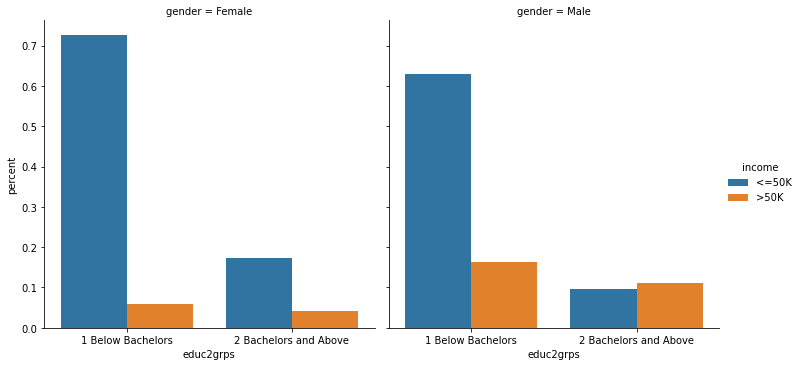

In [25]:
g = sns.catplot(x="educ2grps", y="percent", hue="income", col="gender", errwidth=0, kind="bar", data=working_pop_1994_gender_summary)

#### Analysis:

These charts are based on percentage within a population (ie on female chart, percentage of female population).
Looking at the female and male charts, both have about 21% with bachelors and above education. However, there is a significant difference in how the bachelors and above population for each gender is divided between income categories.   For females with bachelors and above, about one fifth had an over 50k income (4% of 21%).  For males with bachelors and above, over half had an over 50k income (11% of 21%).  Looking at those who had a below bachelors education, about a thirteenth of females had an over 50k income (6% of 79%).  For males, about a fifth had an over 50k income (16% of 79%).

In [26]:
working_pop_1994_race_summary.head(20)

,race3grps,educ2grps,income,count,percent
0,Black,1 Below Bachelors,<=50K,1981,0.800728
1,Black,1 Below Bachelors,>50K,189,0.076395
2,Black,2 Bachelors and Above,<=50K,214,0.086500
3,Black,2 Bachelors and Above,>50K,90,0.036378
4,Other,1 Below Bachelors,<=50K,399,0.708703
5,Other,1 Below Bachelors,>50K,60,0.106572
6,Other,2 Bachelors and Above,<=50K,74,0.131439
7,Other,2 Bachelors and Above,>50K,30,0.053286
8,White,1 Below Bachelors,<=50K,10931,0.639876
9,White,1 Below Bachelors,>50K,2338,0.136861


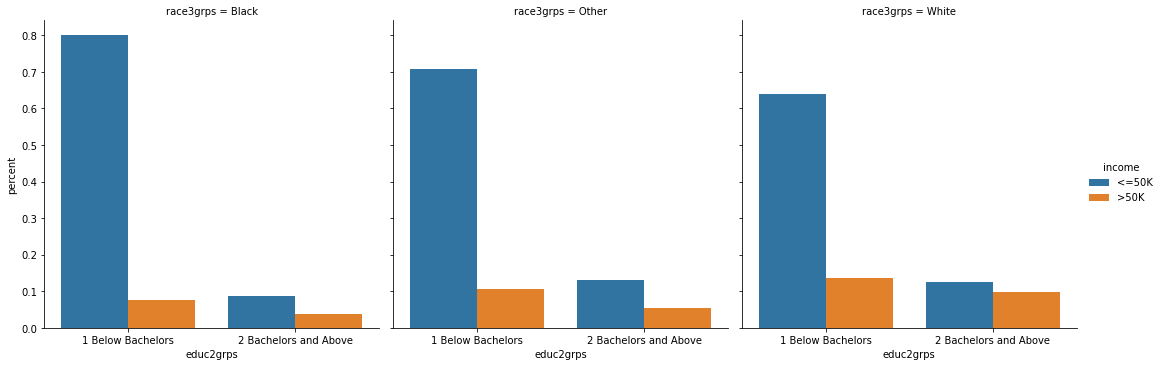

In [27]:
g = sns.catplot(x="educ2grps", y="percent", hue="income", col="race3grps", errwidth=0, kind="bar", data=working_pop_1994_race_summary)

#### Analysis:

These charts are based on percentage within a population (ie on black race chart, percentage of black race population).
Looking at the the three charts, there is a difference in percentage with a bachelors and above education.
The white population had about 21% with bachelors and above education, the black population had about 12%, and the other race population had about 18%. This disparity is notable in its own right, but is not part of what is being examined here.

There is also a difference in income between race categories.   For blacks with bachelors and above, a little over one fourth had an over 50k income (3.5% of 12%).  For whites with bachelors and above, nearly half (45%) had an over 50k income (10% of 22%).  Looking at those who had a below bachelors education, about an eleventh of blacks had an over 50k income (8% of 88%).  For whites, about a fifth had an over 50k income (14% of 64%).

For completion, looking at the small other race population represented in the data:  For those with bachelors and above, a little over one fourth had an over 50k income (5% of 18%).  For those who had a below bachelors education, between a seventh and eighth of them had an over 50k income (11% of 82%).  Thus, their stats were better than blacks, but worse than whites.  However, again, there was only a very small number of this group in the data population.

## 6 Summary<a id='6_Summary'></a>

This data shows census income data from one year, 1994.  The population looked at was reduced to US citizens that worked 40 hours a week that year.  The aim of this exploration was to see if there were disparities reflected between different gender and race groups when comparing those that had an income below 50k vs. 50k and above.   Based on this data, there is a clear difference between male and female subjects.  Most notably, males with a bachelors degree or higher had a 50k or higher income a little more than half the time, while the same was true for only about a fifth of the females.  The discrepancy was not quite as stark between blacks and whites with a bachelors degree or higher, but it was still significant.  Whites with a bachelors degree or higher had a 50k or higher income a little less than half the time (45%), while the same was true for only about a fourth of the blacks.  There were significant disparities when looking at below bachelors education as well.

This data was very generalized and does not tell the whole story.  It is also from 27 years ago, so current data would almost certainly differ.  However, it does point to a clear disparity that is in line with current related stories of wage disparity between gender and race groups.